<a href="https://colab.research.google.com/github/nreddyabhinav/ML/blob/master/Python_Notebooks/backprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount("/content/drive")

KeyboardInterrupt: ignored

In [0]:
from scipy.io import loadmat
import numpy as np
import matplotlib as mpl

In [0]:
data = loadmat('drive/My Drive/ColabNo/nn/ex4data1.mat')
theta = loadmat('drive/My Drive/ColabNo/nn/ex4weights.mat')

In [0]:
ilu = 400
hlu = 25
olu = 10

x = np.array(data['X'])
y = np.array(data['y'])
theta1 = np.array(theta['Theta1'])
theta2 = np.array(theta['Theta2'])


# testX = x[3500:]
# x=x[0:3500]


In [0]:
tempx = x
tempy = y
x=tempx[0:350]
testx = tempx[351:500]
testy = tempy[351:500]
y=tempy[0:350]

for i in range(1,10):
  a=500*i
  b=a+350
  print("a: %d"%(a))
  print("b: %d"%(b))
  x=np.concatenate((x,tempx[a:b]),axis=0)
  y=np.concatenate((y,tempy[a:b]),axis=0)
  a=b+1
  b=500*(i+1)
  print("a: %d"%(a))
  print("b: %d"%(b))
  testx=np.concatenate((testx,tempx[a:b]),axis=0)
  testy=np.concatenate((testy,tempy[a:b]),axis=0)
  
  

a: 500
b: 850
a: 851
b: 1000
a: 1000
b: 1350
a: 1351
b: 1500
a: 1500
b: 1850
a: 1851
b: 2000
a: 2000
b: 2350
a: 2351
b: 2500
a: 2500
b: 2850
a: 2851
b: 3000
a: 3000
b: 3350
a: 3351
b: 3500
a: 3500
b: 3850
a: 3851
b: 4000
a: 4000
b: 4350
a: 4351
b: 4500
a: 4500
b: 4850
a: 4851
b: 5000


In [0]:
each = np.zeros(10)
print(len(y))
for i in range(0,len(y)):
  each[y[i]-1]=each[y[i]-1]+1
print(each)

1241
[  0. 148. 149.  53.  95. 149. 106.  42. 149. 350.]


In [0]:
print(y[1000:1005])
highest = max(y)[0]
Y = np.zeros((1,highest))
for i in y:
  temp = np.zeros((1,highest))
  temp[0][i[0]-1]=1
#   print(temp)
  Y = np.concatenate((Y,temp),axis=0)

Y= Y[1:]
testY = Y[3500:]
Y = Y[0:3050]
print(Y[1000:1005])

[[2]
 [2]
 [2]
 [2]
 [2]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [0]:
print(np.shape(theta1))
print(np.shape(theta2))
print(np.shape(x))
print(np.shape(y))

print(np.shape(Y))
m = np.shape(x)[0]
print(m)

(25, 401)
(10, 26)
(3500, 400)
(5000, 1)
(3050, 10)
3500


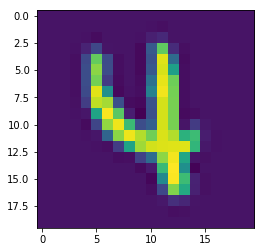

In [0]:
grid =np.reshape(x[2199,:],(20,20)).T

mpl.pyplot.imshow(grid,origin="upper")

# Sigmoid function :

In [0]:
def sigmoid(s):
  return 1/(1+np.exp(-s))

In [0]:
def sigGradient(g):
  g = sigmoid(g)
  return g*(1-g)

#cost function

In [0]:
def cost(h):
  s = 0
  for i in range(0,m):
    s= s+ (np.matmul((-Y[i]),np.log(h[i]).T)-np.matmul((1-Y[i]),np.log((1-h[i] )).T ))
    
  return s/m

#vectorized and regularized cost function 

In [0]:
def costvec(h,l):
  return (np.sum(np.sum((-Y)*np.log(h),axis=1)-np.sum((1-Y)*np.log(1-h), axis=1))/m)+(np.sum(np.sum(theta1[:,1:]**2,axis=0))+np.sum(np.sum(theta2[:,1:]**2,axis=0)))*l/(2*m) 

#Get all the perceptron values (a^(i))

In [0]:
e1 = round((6**(0.5))/((hlu+ilu+1)**(0.5)),2)
print(e1)
theta1=np.random.uniform(-e1,e1,(hlu,ilu+1))
e2 = round((6**(0.5))/((hlu+olu+1)**(0.5)),2)
print(e2)
theta2=np.random.uniform(-e2,e2,(olu,hlu+1))
print(np.shape(theta1))
print(np.shape(theta2))

0.12
0.41
(25, 401)
(10, 26)


In [0]:


a1 = np.concatenate((np.ones((m,1)),x),axis=1)
z2 = np.matmul(a1,theta1.T)
a2 = np.concatenate((np.ones((m,1)),sigmoid(z2)),axis=1)
a3 = sigmoid(np.matmul(a2,theta2.T))


J = costvec(a3,1)
print(J)

6.808402626755402


In [0]:
print(sigGradient(0))
print(sigGradient(123))
print(sigGradient(-1213))

0.25
0.0
0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [0]:
test = np.ones((4,5))
print(np.shape(test))
test = test[:,1:]
print(np.shape(test))

(4, 5)
(4, 4)


In [0]:
print("z2")
print(np.shape(z2))
print("a3-a1")
print(np.shape(a3))
print(np.shape(a2))
print(np.shape(a1))
print("theta")
print(np.shape(theta1))
print(np.shape(theta2))
print("Y")
print(np.shape(Y))

z2
(5000, 25)
a3-a1
(5000, 10)
(5000, 26)
(5000, 401)
theta
(25, 401)
(10, 26)
Y
(5000, 10)


#Backpropagation

In [0]:
def bpANG(alpha):
    b3 = a3 - Y
    b2 = np.matmul(b3,theta2)[:,1:]*sigGradient(z2)
    delta1 = (np.matmul(b2.T,a1) /m)*alpha
    delta2 = (np.matmul(b3.T,a2) /m)*alpha
    return delta1,delta2
    

In [0]:
def bpCp():
  

In [0]:
e1 = round((6**(0.5))/((hlu+ilu+1)**(0.5)),2)
print(e1)
theta1=np.random.uniform(-e1,e1,(hlu,ilu+1))
e2 = round((6**(0.5))/((hlu+olu+1)**(0.5)),2)
print(e2)
theta2=np.random.uniform(-e2,e2,(olu,hlu+1))
print(np.shape(theta1))
print(np.shape(theta2))

for i in range(0,1000):
  a1 = np.concatenate((np.ones((m,1)),x),axis=1)
  z2 = np.matmul(a1,theta1.T)
  a2 = np.concatenate((np.ones((m,1)),sigmoid(z2)),axis=1)
  a3 = sigmoid(np.matmul(a2,theta2.T))
  D1,D2 = bp(0.1)
#   print(D1[1][1])
#   print(D2[1][1])
#   print(cost(a3))
  theta1 = theta1 - D1
  theta2 = theta2 - D2
print(cost(a3))

0.12
0.41
(25, 401)
(10, 26)
2.832899602042499


In [0]:
te1 = np.concatenate((np.ones((m,1)),x),axis=1)
te2 = np.concatenate((np.ones((m,1)),sigmoid(np.matmul(te1,theta1.T))),axis=1)
te3 = sigmoid(np.matmul(te2,theta2.T))
c=0
for i in range(0,m):
  for j in range(0,10):
    if(te3[i,j]>0.5):
      te3[i,j] = 1
    else:
      te3[i,j]=0
  if(te3[i].all()==Y[i].all()):
    c=c+1

print(c)
print("accuracy")
print(c/m)

5000
accuracy
1.0
